In [108]:
import pandas as pd
import numpy as np
from datetime import date,timedelta
import json

# parameters for each country

In [109]:
url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
data_covid_full = pd.read_csv(url)
for i in range(len(data_covid_full)):
    data_covid_full['location'].iloc[i]=data_covid_full.iloc[i]['location'].replace(' ','_')
data_covid_full.head()

C:\anconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [112]:
data_covid_full.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [127]:
countries_para=data_covid_full.groupby('location')[['iso_code','continent','total_deaths','total_deaths_per_million',\
                                       'stringency_index', 'population', 'population_density', 'median_age',\
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty'\
       , 'diabetes_prevalence', 'female_smokers',\
       'male_smokers', 'hospital_beds_per_thousand',\
       'life_expectancy' ]].agg('max')
countries_para.head(10)

,iso_code,continent,total_deaths,total_deaths_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,1401.0,35.989,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,0.50,64.83
Albania,ALB,Europe,266.0,92.432,89.81,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,10.08,7.1,51.2,2.89,78.57
Algeria,DZA,Africa,1475.0,33.637,92.13,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,6.73,0.7,30.4,1.90,76.88
Andorra,AND,Europe,53.0,685.951,56.48,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,7.97,29.0,37.8,NaN,83.73
Angola,AGO,Africa,105.0,3.195,90.74,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,3.94,NaN,NaN,NaN,61.15
Anguilla,AIA,North America,0.0,0.000,82.41,15002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88
Antigua_and_Barbuda,ATG,North America,3.0,30.635,NaN,97928.0,231.845,32.1,6.933,4.631,21490.943,NaN,13.17,NaN,NaN,3.80,77.02
Argentina,ARG,South America,7944.0,175.769,100.00,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,5.50,16.2,27.7,5.00,76.67
Armenia,ARM,Asia,864.0,291.573,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,7.11,1.5,52.1,4.20,75.09


In [128]:
countries_para.describe()

,total_deaths,total_deaths_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
count,211.000000,210.000000,180.000000,2.110000e+02,200.000000,187.000000,184.000000,186.000000,184.000000,122.000000,194.000000,141.000000,139.000000,165.000000,208.000000
mean,7888.374408,102.034705,83.197444,7.370985e+07,360.369760,30.629412,8.847957,5.564237,19464.082478,13.830328,8.065567,10.413007,32.636223,3.010806,73.525288
std,59414.383258,178.425428,14.309436,5.526716e+08,1573.678206,9.108589,6.196086,4.205258,19768.790977,20.453616,4.234085,10.448330,13.660474,2.457507,7.542061
min,0.000000,0.000000,16.670000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,0.990000,0.100000,7.700000,0.100000,53.280000
25%,15.000000,5.779750,77.780000,1.074083e+06,37.624000,22.300000,3.459750,2.041250,4522.973000,0.600000,5.310000,1.900000,21.500000,1.300000,69.380000
50%,105.000000,27.917500,86.110000,6.948445e+06,87.250000,30.600000,6.736500,4.062000,13183.081500,2.200000,7.155000,6.200000,31.400000,2.397000,75.070000
75%,784.000000,110.044000,93.520000,2.646207e+07,213.880000,38.900000,14.341750,9.044750,28143.439750,21.350000,10.420000,19.100000,41.200000,3.861000,78.935000
max,832002.000000,1237.551000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,23.360000,44.000000,78.100000,13.800000,86.750000


In [172]:
countries_para.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
iso_code                      211 non-null object
continent                     210 non-null object
total_deaths                  211 non-null float64
total_deaths_per_million      210 non-null float64
stringency_index              180 non-null float64
population                    211 non-null float64
population_density            200 non-null float64
median_age                    187 non-null float64
aged_65_older                 184 non-null float64
aged_70_older                 186 non-null float64
gdp_per_capita                184 non-null float64
extreme_poverty               170 non-null object
diabetes_prevalence           194 non-null float64
female_smokers                141 non-null float64
male_smokers                  139 non-null float64
hospital_beds_per_thousand    180 non-null float64
life_expectancy               208 non-null float64
smoking_d            

In [131]:
c=[]
for i in range(len(countries_para.index)):
    if countries_para.iloc[i].isnull().values.any() == True:
        if countries_para.drop(['hospital_beds_per_thousand'],axis=1).iloc[i].isnull().values.any() == False:
            c.append(i)
for j in range(len(c)):
    print(countries_para.iloc[c[j]]['continent'])

Africa
Africa
Africa
Africa
Africa
Africa


In [133]:
mean_beds_in_africa = countries_para[countries_para.continent=='Africa']['hospital_beds_per_thousand'].mean()
countries_para[countries_para.continent == 'Africa'] = countries_para.replace({'hospital_beds_per_thousand':np.nan}, mean_beds_in_africa)

In [134]:
countries_para.to_csv('covid_database')

adding parameters

In [135]:
from selenium import webdriver

In [157]:
driver = webdriver.Chrome()

List of countries by percentage of population living in poverty

In [139]:
poverty_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_percentage_of_population_living_in_poverty'
driver.get(poverty_url)

name=[]
poverty=[]
pov_xml1='//*[@id="mw-content-text"]/div/table[1]/tbody/tr['
pov_xml2=']/td[2]'
str_xml1='//*[@id="mw-content-text"]/div/table[1]/tbody/tr['
str_xml2=']/td[1]/a'
for i in range(1,197):
    x_xml=str(i)
    total_xml = str_xml1+x_xml+str_xml2
    total_pov = pov_xml1+x_xml+pov_xml2
    elements_XPath = driver.find_elements_by_xpath(total_xml)[0].text
    pov_XPath = driver.find_elements_by_xpath(total_pov)[0].text
    name.append(elements_XPath)
    poverty.append(pov_XPath)

df_poverty = pd.DataFrame(data={'country':name, 'poverty':poverty})
df_poverty.set_index('country', inplace=True)
df_poverty.rename(index={'Eswatini':'Swaziland', 'Korea, South':'South Korea', 'São Tomé and Príncipe':'Sao Tome and Principe',\
                     'Vatican City':'Vatican', 'Congo, Republic of the':'Congo','Bahamas, The':'Bahamas',\
                      'North Macedonia':'Macedonia', 'Congo, Democratic Republic of the':'Democratic Republic of Congo'\
                      ,'Gambia, The':'Gambia', 'Ivory Coast':'Cote d\'Ivoire', 'East Timor':'Timor'},inplace=True)

for i in range(len(df_poverty)):
    try:
        if np.isnan(countries_para[countries_para.index==df_poverty.index[i]]['extreme_poverty'][0]):
            t=countries_para[countries_para.index==df_poverty.index[i]].replace({'extreme_poverty':np.nan}, df_poverty.iloc[i]['poverty'])
            countries_para[countries_para.index==df_poverty.index[i]]=t
    except:
        pass
    
poverty_add_dict = {'Swaziland':28.4, 'Afghanistan':36.0, 'Bahamas':1.9, 'Bahrain':0.07, 'Barbados':1.38, 'Brunei':0.02,
                    'Eritrea':64.0, 'New Zealand':0.01, 'Kuwait':0.02,'Oman':0.1, 'Qatar':0.0, 'Saudi Arabia':0.55,
                    'Singapore':1.0, 'United Arab Emirates':0.02, 'Antigua and Barbuda':1.7, 'Equatorial Guinea':40.0,
                   'Grenada':13.0, 'Libya':7.24, 'Saint Vincent and the Grenadines':5.12}
for i in poverty_add_dict.keys():
    countries_para[countries_para.index==i] = countries_para[countries_para.index==i].replace({'extreme_poverty':np.nan}, poverty_add_dict[i])

List of countries by percentage of population living with obesity

In [155]:
obesity_url = 'https://ourworldindata.org/obesity'
driver.get(obesity_url)
u = '/html/body/main/article/div[2]/div[2]/div/div/section[4]/div[3]/div[2]/figure/div/div[2]/div[2]/nav/ul/li[3]/a'
clickme= driver.find_element_by_xpath(u)
clickme.click()
name=[]
obesity=[]
obs_xml1='/html/body/main/article/div[2]/div[2]/div/div/section[4]/div[3]/div[2]/figure/div/div[1]/div/table/tbody/tr['
obs_xml2=']/td[3]'
str_xml1=obs_xml1
str_xml2=']/td[1]'
for i in range(1,199):
    x_xml=str(i)
    total_xml = str_xml1+x_xml+str_xml2
    total_obs = obs_xml1+x_xml+obs_xml2
    elements_XPath = driver.find_elements_by_xpath(total_xml)[0].text
    obs_XPath = driver.find_elements_by_xpath(total_obs)[0].text
    name.append(elements_XPath)
    obesity.append(float(obs_XPath[:-1]))

df_obesity=pd.DataFrame(data={'country':name, 'obesity':obesity})
df_obesity.set_index('country', inplace=True)
countries_para['obesity']=np.array(np.nan)

for i in range(len(obesity)):
    try:
        if np.isnan(countries_para[countries_para.index==df_obesity.index[i]]['obesity'].iloc[0]):
            t=countries_para[countries_para.index==df_obesity.index[i]].replace({'obesity':np.nan}, df_obesity.iloc[i]['obesity'])
            countries_para[countries_para.index==df_obesity.index[i]]=t
    except:
        pass

List of countries by percentage of hypertension as cause of death

In [159]:
hypertension_url = 'https://www.worldlifeexpectancy.com/cause-of-death/hypertension/by-country/'
driver.get(hypertension_url)

name=[]
blood_p=[]
bld_xml1='//*[@id="chart_continer"]/table/tbody/tr['
bld_xml2= ']/td[4]'
bld_xml3 =']/td[8]'
str_xml1=bld_xml1
str_xml2=']/td[3]'
str_xml3=']/td[7]'
d=0
for i in range(1,93):
    x_xml=str(i)
    for s in [str_xml2,str_xml3]:
        if i==92:
            d+=1
        if d<2:
            total_xml = str_xml1+x_xml+s
            elements_XPath = driver.find_elements_by_xpath(total_xml)[0].text
            name.append(elements_XPath)
    d=0
    for b in [bld_xml2,bld_xml3]:  
        if i==92:
            d+=1
        if d<2:
            total_bld = bld_xml1+x_xml+b
            bld_XPath = driver.find_elements_by_xpath(total_bld)[0].text
            print(i,bld_XPath)
            blood_p.append(float(bld_XPath))

df_blood_pressure=pd.DataFrame(data={'country':name, 'blood_p':blood_p})
df_blood_pressure['country'] = df_blood_pressure['country'].apply(lambda x: x.title())
df_blood_pressure.set_index('country', inplace=True)

df_blood_pressure.rename(index={ 'Viet Nam':'Vietnam', 'Sao Tome':'Sao Tome and Principe', 'Timor-Leste':'Timor',\
                             'Dr Congo':'Democratic Republic of Congo', 'Cote D Ivoire':'Cote d\'Ivoire',\
                              'Arab Emirates':'United Arab Emirates', 'Saint Vincent':'Saint Vincent and the Grenadines',\
                              'Bosnia/Herzeg.':'Bosnia and Herzegovina', 'Equ. Guinea':'Equatorial Guinea',\
                            'Central Africa':'Central African Republic', 'No Macedonia':'Macedonia',\
                             'Dominican Rep.':'Dominican Republic','Antigua/Bar.':'Antigua and Barbuda',\
                            'Trinidad/Tob.':'Trinidad and Tobago', 'New Guinea':'Papua New Guinea' },inplace=True)

countries_para['blood_p']=np.array(np.nan)
for i in range(len(df_blood_pressure)):
    try:
        if np.isnan(countries_para[countries_para.index==df_blood_pressure.index[i]]['blood_p'].iloc[0]):
            t=countries_para[countries_para.index==df_blood_pressure.index[i]].replace({'blood_p':np.nan}, df_blood_pressure.iloc[i]['blood_p'])
            countries_para[countries_para.index==df_blood_pressure.index[i]]=t
    except:
        pass

List of countries by death rate from smoking

In [160]:
smoking_url = 'https://ourworldindata.org/grapher/death-rate-smoking?tab=table'
driver.get(smoking_url)

name=[]
smoking=[]
smk_xml1='/html/body/main/figure/div/div[1]/div/table/tbody/tr['
smk_xml2= ']/td[3]'
str_xml1=smk_xml1
str_xml2=']/td[1]'
for i in range(1,232):
    x_xml=str(i)
    total_xml = str_xml1+x_xml+str_xml2
    elements_XPath = driver.find_elements_by_xpath(total_xml)[0].text
    name.append(elements_XPath)
    total_smk = smk_xml1+x_xml+smk_xml2
    smk_XPath = driver.find_elements_by_xpath(total_smk)[0].text
    print(i,smk_XPath)
    smoking.append(float(smk_XPath))
    
df_smoking=pd.DataFrame(data={'country':name, 'smoking_d':smoking})
df_smoking.set_index('country',inplace=True)
countries_para['smoking_d']=np.array(np.nan)

for i in range(len(df_smoking)):
    try:
        if np.isnan(countries_para[countries_para.index==df_smoking.index[i]]['smoking_d'].iloc[0]):
            t=countries_para[countries_para.index==df_smoking.index[i]].replace({'smoking_d':np.nan}, df_smoking.iloc[i]['smoking_d'])
            countries_para[countries_para.index==df_smoking.index[i]]=t
    except:
        pass

1 89.89
2 98.24
3 60.41
4 73.54
5 29.70
6 57.77
7 87.58
8 38.42
9 96.51
10 116.90
11 51.28
12 50.83
13 63.65
14 142.20
15 42.93
16 45.85
17 80.07
18 34.30
19 134.83
20 84.06
21 51.52
22 45.25
23 48.71
24 54.19
25 49.84
26 141.74
27 74.19
28 74.85
29 104.56
30 141.21
31 36.27
32 67.49
33 128.84
34 45.91
35 70.30
36 29.30
37 75.48
38 112.57
39 110.44
40 114.48
41 124.74
42 45.36
43 59.92
44 31.58
45 44.70
46 120.22
47 35.98
48 41.31
49 67.39
50 45.06
51 59.96
52 105.03
53 97.77
54 77.61
55 97.96
56 48.23
57 97.12
58 68.22
59 40.57
60 85.93
61 119.16
62 134.30
63 54.49
64 33.14
65 122.69
66 38.82
67 65.32
68 39.51
69 48.88
70 81.79
71 25.32
72 121.50
73 45.18
74 57.40
75 62.19
76 72.58
77 116.20
78 74.00
79 40.93
80 100.04
81 185.65
82 56.44
83 63.84
84 36.92
85 42.39
86 44.26
87 67.23
88 62.34
89 67.81
90 66.34
91 52.53
92 108.02
93 70.27
94 126.12
95 58.23
96 91.58
97 116.48
98 59.50
99 54.05
100 76.08
101 52.50
102 55.24
103 74.99
104 52.16
105 65.83
106 118.98
107 50.35
108 266.13
109

In [162]:
driver.close()

In [173]:
countries_para.drop(['male_smokers','female_smokers'],axis=1,inplace=True)

List of countries by death from SARS

In [177]:
countries_para['sars_deaths']=np.array(np.zeros(len(countries_para)))

sars_dict = {'CHN':349.0, 'SGP':33.0, 'CAN':44.0, 'VNM':5.0, 'PHL':2.0, 'THA':2.0,
                    'FRA':1.0, 'MYS':2.0, 'ZAF':1.0}
for i in sars_dict.keys():
    countries_para[countries_para.iso_code==i] = countries_para[countries_para.iso_code==i].replace({'sars_deaths': 0} ,sars_dict[i])

saving to csv file

In [215]:
countries_para.drop(['stringency_index','total_deaths','total_deaths_per_million'], axis = 1, inplace = True)
countries_para.rename({'iso_code':'iso'}, inplace = True)
countries_para.set_index('iso', inplace = True)

In [ ]:
countries_para.to_csv('full_data_covid.csv')

# total deaths per country for each day

In [219]:
countries_para= pd.read_csv('full_data_covid.csv')
countries_para.set_index('iso', inplace = True)

In [220]:
total_deaths_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths.csv'
total_deaths = pd.read_csv(total_deaths_url).set_index('date')
total_deaths.ffill(inplace=True)
total_deaths.fillna(0,inplace=True)
for col in total_deaths.columns:
    total_deaths.rename(columns={col:countries_para[countries_para.location==col].index[0]},inplace=True)
    
    

In [ ]:
total_deaths.to_csv('countries_deaths.csv')

# first case for each country

In [224]:
url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths.csv'
total_deaths = pd.read_csv(url)
first_case=pd.DataFrame(total_deaths.drop('date',axis=1).columns)
first_case.rename(columns={0:'country'},inplace=True)
first_case.set_index('country',inplace=True)
first_case['first_case']=first_case.index
for c in first_case.index:
    t=total_deaths.date[total_deaths[c]>0]
    if not t.empty:
        first_case['first_case'].loc[c]=t.iloc[0]
    else:
        first_case['first_case'].loc[c]=np.nan
first_case.sort_index(ascending=True, inplace=True)

first_case['iso']=np.array(np.nan)
for c in first_case.index:
    t = first_case[first_case.index == c].replace({'iso':np.nan},countries_para[countries_para.location==c].index[0])
    first_case[first_case.index == c] = t
    
first_case.set_index('iso', inplace=True)
first_case.loc['VNM'] = first_case.loc['VNM'].replace({'first_case':np.nan},'2020-03-15')
first_case = first_case.append(pd.DataFrame(data={'country':'Hong Kong','first_case':'2020-03-15'}, index=['HKG']))

first_covid.to_csv('first_case.csv')

C:\anconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [225]:
first_covid.head()

NameError: name 'first_covid' is not defined

# policy per country for each day

In [ ]:
countries_para.dropna(inplace=True)

policy for a specific day in a country

In [ ]:
def policy(iso, date_cov):
    try:
        url='https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/{0}/{1}'.format(iso, date_cov)
        oxford_cov = pd.read_json(url,typ='records')
        cov_pol = []
        t=oxford_cov['policyActions']
        del t[10]
        del t[10]
        del t[-1]
        del t[-1]
        try:
            for i in range(len(t)):
                cov_pol.append([t[i]['policy_type_display'],t[i]['policyvalue_actual']])
        except:
            pass
    except:
        pass
    return cov_pol

In [ ]:
def weekly_policy(iso, date_cov):
    weekly =[]
    for i in range(7):
        day = str(date.fromisoformat(date_cov)+timedelta(i))
        weekly.append(policy(iso, day))
    return weekly

takes a country and policies from a specific day and makes a data frame

In [226]:
def dataframe_cov(iso, date_cov):
    try:
        
        daily = policy(iso, date_cov)
        columns_pol = ['iso']
        value_pol = [iso]
        len_col = len(daily)

        for i in range(len_col):  
            columns_pol.append(daily[i][0])
            value_pol.append(daily[i][1])
        df= pd.DataFrame(data = np.reshape(value_pol,(1,14)), columns=columns_pol)
        df[df.columns[1:]]=df[df.columns[1:]].astype('int')
        return df
    except:
        pass

mean deaths in a country for a specific week

In [227]:
def mean_death(iso,date_cov,i=0):
    first_date = date.fromisoformat(date_cov)+timedelta(7+i)
    last_date = first_date+timedelta(7)
    try:
        today = total_deaths.loc[str(first_date)][iso]
        future = total_deaths.loc[str(last_date)][iso]
        week = (future-today)/7
        print(today, future, week)
        return pd.DataFrame(data={'mean_deaths_{0}'.format(i+7):week},index={iso})
    except:
        pass
    
def present_death(iso,date_cov):
    first_date = date.fromisoformat(date_cov)
    last_date = first_date+timedelta(7)
    try:
        daily = (total_deaths.loc[str(last_date)][iso]-total_deaths.loc[str(first_date)][iso])/7
        return pd.DataFrame(data={'present_death':daily},index={iso})
    except:
        pass

policy data scraping

In [228]:
def action():
    final_date = date.fromisoformat('2020-07-26')
    covid_data=pd.DataFrame()
    f=0
    for iso in countries_para.index:
        print(iso, f)
        try:
            date_cov = date.fromisoformat(first_covid.loc[iso]['first_case'])
        except:
            date_cov = date.fromisoformat('2020-03-01')
        while date_cov < final_date:
            print(date_cov)
            try:
                death=mean_death(iso,str(date_cov)).join(mean_death(iso,str(date_cov),7)).join(mean_death(iso,str(date_cov),14))
                covid_mean = dataframe_cov(iso,str(date_cov)).set_index('iso')
                present = present_death(iso,str(date_cov))
                time_cov = pd.DataFrame(data={'date':str(date_cov)},index={iso})
                
                data1=covid_mean.join(present).join(death)
                data=pd.DataFrame(countries_para.loc[iso]).T.join(data1)
                data=time_cov.join(data)
                covid_data=covid_data.append(data)
            except:
                print(iso, date_cov ,' fail')
            date_cov+=timedelta(1)
        f+=1
    return covid_data

In [229]:
covid19 = action()

In [231]:
covid19[covid19.columns[14:17]]=covid19[covid19.columns[14:17]].astype(float)
covid19[covid19.columns[19:24]]=covid19[covid19.columns[19:24]].astype(float)
covid19[covid19.columns[25:]]=covid19[covid19.columns[25:]].astype(float)

con= covid19[(covid19['present_death'] <1)]
covid19 = pd.concat([covid19, con]).drop_duplicates(keep=False)
covid19=pd.get_dummies(covid19 , columns=['continent'])

covid19.info()

In [ ]:
covid19.to_csv('corona_policy_dataframe.csv')

In [232]:
covid_data = pd.read_csv('corona_policy_dataframe.csv')
covid_data = covid_data[covid_data.present_death>0]
covid_data = pd.get_dummies(covid_data , columns=['continent'])
covid_data.rename(columns = {'Unnamed: 0':'iso'},inplace=True)
covid_data.set_index('iso',inplace=True)
covid_data.index.unique()

Index(['AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD',
       ...
       'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VEN', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso', length=140)

# ml models - before data cleaning

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [234]:
scaler = MinMaxScaler()
dfTest = covid_data.drop(['date', 'location'],axis=1)
dfTest[dfTest.columns] = scaler.fit_transform(dfTest[dfTest.columns])

In [235]:
model1 = LinearRegression()
X_train1, X_test1, y_train1, y_test1 = train_test_split(dfTest.drop(['mean_deaths_7', 'mean_deaths_14', 'mean_deaths_21'],axis=1),dfTest['mean_deaths_7'],test_size=0.33, random_state=42)
model1.fit(X_train1,y_train1)
model1.score(X_test1,y_test1)
pred1 = model1.predict(X_test1)
model1.score(X_test1,y_test1)

0.900146718893577

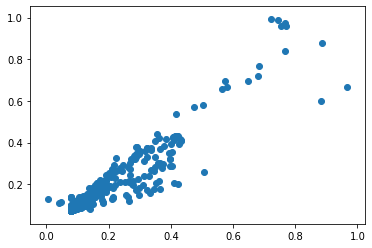

In [236]:
plt.scatter(y_test1,pred1)

In [237]:
def change(x):
    return x[0]/x[1]
covid_data['mean_death0'] = covid_data[['mean_deaths_7','present_death']].apply(change, axis=1)
covid_data['mean_death1'] = covid_data[['mean_deaths_14','present_death']].apply(change, axis=1)
covid_data['mean_death2'] = covid_data[['mean_deaths_21','present_death']].apply(change, axis=1)

In [238]:
scaler = MinMaxScaler()
dfTest = covid_data.drop(['date', 'location'],axis=1)
dfTest[dfTest.columns] = scaler.fit_transform(dfTest[dfTest.columns])

In [239]:
model2 = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfTest.drop(['mean_deaths_7', 'mean_deaths_14', 'mean_deaths_21', 'present_death', 'mean_death0', 'mean_death1', 'mean_death2'],axis=1),dfTest['mean_death0'],test_size=0.33, random_state=42)
model2.fit(X_train2,y_train2)
model2.score(X_test2,y_test2)

-0.17595934093807153

In [240]:
from sklearn.ensemble import RandomForestRegressor

In [241]:
covid_data.columns

Index(['Cancel public events', 'Close public transport', 'Contact tracing',
       'Debt/contract relief', 'Emergency investment in healthcare',
       'Income support', 'International travel controls',
       'Public information campaigns', 'Restrictions on gatherings',
       'Restrictions on internal movement', 'School closing',
       'Stay at home requirements', 'Testing policy', 'Workplace closing',
       'aged_65_older', 'aged_70_older', 'blood_p', 'date',
       'diabetes_prevalence', 'extreme_poverty', 'gdp_per_capita',
       'hospital_beds_per_thousand', 'life_expectancy', 'location',
       'mean_deaths_14', 'mean_deaths_21', 'mean_deaths_7', 'median_age',
       'obesity', 'population', 'population_density', 'present_death',
       'sars_deaths', 'smoking_d', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'mean_death0', 'mean_death1', 'mean_death2'],
      dtype='object')

In [242]:
scaler = MinMaxScaler()
dfTest = covid_data[covid_data.continent_Europe==1].drop(['date', 'location'],axis=1)
dfTest[dfTest.columns] = scaler.fit_transform(dfTest[dfTest.columns])

forest_model2 = RandomForestRegressor(random_state = 101, max_depth=12 , n_estimators=11)
X_trainF, X_testF, y_trainF, y_testF = train_test_split(dfTest.drop(['mean_deaths_7', 'mean_deaths_14', 'mean_deaths_21', 'present_death', 'mean_death0','mean_death1','mean_death2'], axis=1), dfTest['mean_death1'] ,test_size=0.33, random_state=42)
forest_model2.fit(X_trainF, y_trainF)
forest_model2.score(X_testF, y_testF)

0.553104277306915

# data visualization and analysis

In [243]:
covid_data.rename(columns = {'School closing':'school_closing', 'Restrictions on gatherings':'restrictions_on_gatherings', 
                      'Workplace closing':'workplace_closing', 'Cancel public events':'cancel_public_events',
                      'Stay at home requirements':'stay_at_home_requirements',
                      'Restrictions on internal movement':'restrictions_on_internal_movement', 
                     'International travel controls':'international_travel_controls', 'Income support':'income_support',
                    'Debt/contract relief':'debt/contract_relief','Public information campaigns':'public_information_campaigns',
                      'Testing policy':'testing_policy', 'Contact tracing':'contact_tracing',
                        'Close public transport':'close_public_transport'},inplace=True)
covid_data['std_deaths0'] = covid_data['mean_death0']
covid_data['std_deaths1'] = covid_data['mean_death1']
covid_data['std_deaths2'] = covid_data['mean_death2']

In [244]:
features = ['school_closing', 'restrictions_on_gatherings', 'workplace_closing', 'cancel_public_events',
            'stay_at_home_requirements','restrictions_on_internal_movement', 'international_travel_controls',
            'income_support', 'debt/contract_relief','public_information_campaigns',
            'testing_policy', 'contact_tracing','close_public_transport']

oecd=['BEL','ISR','AUS', 'AUT', 'CAN', 'CHL', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 
        'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
        'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'CHE', 'TUR', 'GBR', 'USA']

findig minimum present_death value for each country with 'knee of the curve' for reducig standard deviation

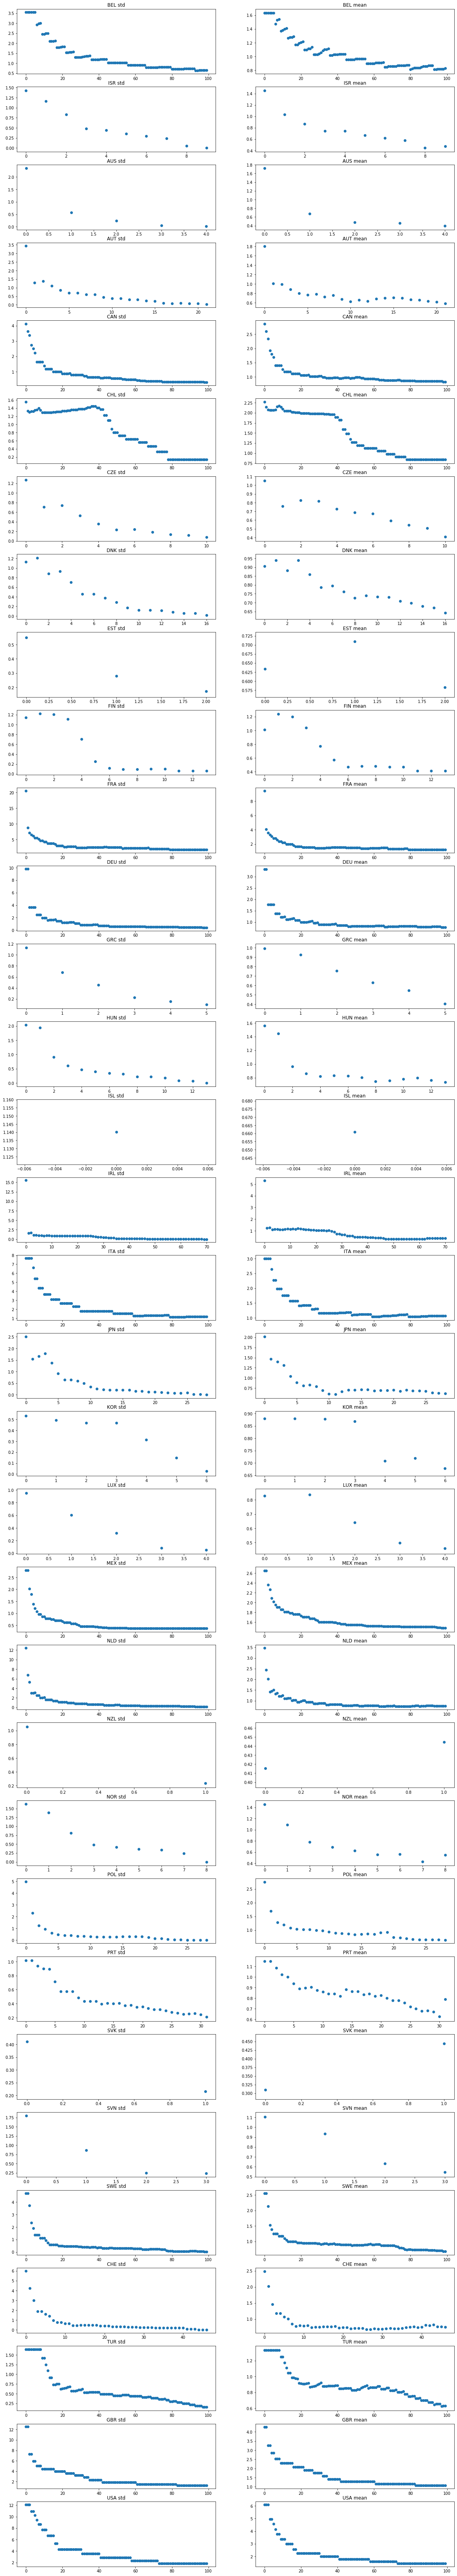

In [245]:
fig, axes = plt.subplots(33,2,figsize =(20, 120)) # create figure and axes
for i,iso in enumerate(oecd):
    
    ystd = []
    ymean = []
    try:
        for j in range(100):
            dc = covid_data[covid_data['present_death'] > j ]
            a=dc.loc[iso]['std_deaths1'].std()
            b=dc.loc[iso]['mean_death1'].mean()
            ystd.append(a)
            ymean.append(b)
    except:
        pass
    try:
        x = range(j)
        axes[i][0].scatter(x, ystd)
    except:
        x = range(100)
        axes[i][0].scatter(x, ystd)
    
    axes[i][1].scatter(x, ymean)
    axes[i][0].set_title(iso + ' std')
    axes[i][1].set_title(iso + ' mean')
plt.show()

In [246]:
dic_std = {'SVN':1, 'LUX':2, 'CZE':1, 'FRA':22, 'NLD':13, 'DNK':3, 'NOR':1, 'BEL':13, 'DEU':13, 'AUT':3,
       'ITA':65, 'ISR':1, 'AUS':1, 'HUN':8, 'PRT':4, 'CAN':13, 'EST':1, 'FIN':6, 'CHL':13,
          'GRC':2, 'IRL':36, 'JPN':6, 'KOR':1, 'MEX':32, 'POL':20, 'PRT':4, 'SWE':20, 'CHE':13, 'TUR':20} 

In [247]:
df=pd.DataFrame()
for iso in list(dic_std.keys()):
    df = df.append(covid_data[(covid_data.index==iso) & (covid_data['present_death'] > dic_std[iso])])
df.dropna(inplace=True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, SVN to TUR
Data columns (total 46 columns):
cancel_public_events                  1557 non-null int64
close_public_transport                1557 non-null int64
contact_tracing                       1557 non-null int64
debt/contract_relief                  1557 non-null int64
Emergency investment in healthcare    1557 non-null int64
income_support                        1557 non-null int64
international_travel_controls         1557 non-null int64
public_information_campaigns          1557 non-null int64
restrictions_on_gatherings            1557 non-null int64
restrictions_on_internal_movement     1557 non-null int64
school_closing                        1557 non-null int64
stay_at_home_requirements             1557 non-null int64
testing_policy                        1557 non-null int64
workplace_closing                     1557 non-null int64
aged_65_older                         1557 non-null float64
aged_70_older            

In [249]:
df.loc[oecd].groupby('school_closing').agg({'mean_death1':'mean', 'std_deaths1':'std'})

C:\anconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,mean_death1,std_deaths1
school_closing,,
0.0,3.608454,5.397516
1.0,1.073472,1.240961
2.0,0.651609,0.921352
3.0,1.166391,1.310526


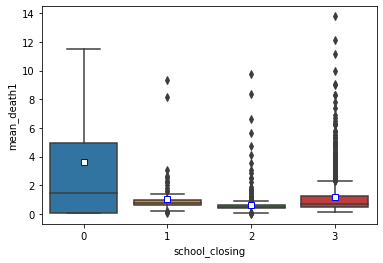

In [250]:
sns.boxplot(data=df, x='school_closing',y='mean_death1', showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

data only for Europe

In [251]:
dff = pd.DataFrame()

for i in range(len(df[df['continent_Europe']==1])):
    if (date.fromisoformat(df[df['continent_Europe']==1].iloc[i]['date'])) > (date.fromisoformat('2020-04-01')):
        dff=dff.append(df[df['continent_Europe']==1].iloc[i])

In [252]:
dff.groupby('school_closing').agg({'mean_death1':'mean', 'std_deaths1':'std'})

,mean_death1,std_deaths1
school_closing,,
0.0,0.088889,0.031427
1.0,0.777953,0.282486
2.0,0.495332,0.199533
3.0,0.590588,0.221300


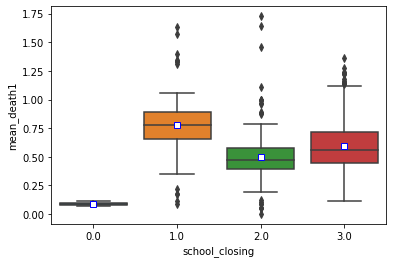

In [253]:
sns.boxplot(data=dff, x='school_closing',y='mean_death1', showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

checking which countries have more than one non-dominant value (0,1,2,3,4) for a feature

In [254]:
def check_iso(countries, f, s):
    dic={}
    for iso in countries:
        try:
            n = dff.loc[iso].index.size
            for i in dff.loc[iso][f].unique():
                s = dff[dff[f]==i].loc[iso].index.size
                if s>(0.8*n):
                    dic.pop(iso,None)
                    break
                else:
                    dic[iso]=True
        except:
            pass
    print(list(dic.keys()))
    return (multi_features(list(dic.keys()), f, s))

n_th root of multiplication of relative values in a policy by list of countries

In [255]:
def multi_f_comb(countries,feature,s):
    multi=pd.DataFrame(columns=['dev_mean','dev_std','from','to'])
    for iso in countries:
        if s==0:
            a = dff.loc[iso].groupby(feature).agg({'mean_death0':'mean', 'std_deaths0':'std'})
        if s==1:
            a = dff.loc[iso].groupby(feature).agg({'mean_death1':'mean', 'std_deaths1':'std'})
        if s==2:
            a = dff.loc[iso].groupby(feature).agg({'mean_death2':'mean', 'std_deaths2':'std'})
        try:
            for i in range(len(a)-1):
                for j in range(i+1,len(a)):
                    f = a.iloc[i,0]
                    t = a.iloc[j,0]
                    ser = pd.Series(t/f)
                    multi = multi.append({'dev_mean':ser,'dev_std':ser,'from':a.index[i],'to':a.index[j]},ignore_index=True)
        except:
            pass
    count=multi.groupby(['from','to']).agg({'dev_mean':'count'})['dev_mean']
    countS=[]
    for i,v in enumerate(count):
        countS.append(count.iloc[i])
    return multi.groupby(['from','to']).agg({'dev_mean':(lambda value: (np.prod(value)**(1.0/countS[i]))) for i,v in enumerate(countS)})

In [256]:
def multi_features(countries,feature,s):
    multi=pd.DataFrame(columns=['dev_mean','dev_std','from','to'])
    for iso in countries:
        if s==0:
            a = dff.loc[iso].groupby(feature).agg({'mean_death0':'mean', 'std_deaths0':'std'})
        elif s==1:
            a = dff.loc[iso].groupby(feature).agg({'mean_death1':'mean', 'std_deaths1':'std'})
        else:
            a = dff.loc[iso].groupby(feature).agg({'mean_death2':'mean', 'std_deaths2':'std'})
        for i in range(len(a)-1):
            for j in range(i+1,len(a)):
                ser=pd.Series(a.iloc[j,0]/a.iloc[i,0])
                multi = multi.append({'dev_mean':a.iloc[j,0]/a.iloc[i,0],'dev_std':(a.iloc[j,0]/a.iloc[i,0]),'from':a.index[i],'to':a.index[j]},ignore_index=True)

    print(multi.groupby(['from','to']).agg({'dev_mean':'mean', 'dev_std':'std'}))

In [257]:
def multi_features_plot(countries,feature,s):
    multi_new = multi_f_comb(countries,feature,s)
    maxA=max(multi_new.index.get_level_values(0))
    sns.barplot(data=multi_new, x=multi_new.index.get_level_values(0), hue=multi_new.index.get_level_values(1), y='dev_mean')
    plt.plot(np.linspace(1,1,maxA+1),ls='--',color='g',alpha=1,linewidth=3)
    multi_features(countries,feature,s)

In [258]:
for f in features:
    print(f)
    try:
        print(check_iso(dff.index.unique(),f,1))
    except:
        pass
    print()

school_closing
['CZE', 'FRA', 'NLD', 'DNK', 'NOR', 'DEU', 'PRT']
          dev_mean  dev_std
from to                    
0.0  2.0  0.650695      NaN
     3.0  1.450682      NaN
2.0  3.0  1.437207  0.52076
None

restrictions_on_gatherings
['CZE', 'FRA', 'NOR', 'AUT', 'ITA']
          dev_mean   dev_std
from to                     
0.0  4.0  1.158194       NaN
2.0  3.0  1.046942  0.895152
     4.0  1.597994  1.211271
3.0  4.0  1.126871  0.594770
None

workplace_closing
['SVN', 'CZE', 'FRA', 'NLD', 'BEL', 'AUT', 'ITA', 'PRT']
          dev_mean   dev_std
from to                     
1.0  2.0  0.761089  0.349815
     3.0  0.937235  0.359955
2.0  3.0  1.211892  0.329629
None

cancel_public_events
[]

stay_at_home_requirements
['CZE', 'FRA', 'NLD', 'DEU', 'AUT', 'ITA', 'PRT']
          dev_mean   dev_std
from to                     
0.0  1.0  0.899919  0.091566
     2.0  0.823569  0.362615
1.0  2.0  1.106716  0.232883
     3.0  1.408609       NaN
2.0  3.0  1.268194       NaN
None

restrictio

In [262]:
dff.loc['DEU'].groupby('testing_policy').agg({'mean_death0':'mean', 'std_deaths0':'std'})

,mean_death0,std_deaths0
testing_policy,,
1.0,0.893103,0.189712
3.0,0.717170,0.106796


Graphs - the thresholds is 1.0 and mraked with green line, if column is below it - the transition between the stringencies in a restriction will have a positive effect on the mortality and will bring the number of death cases down

          dev_mean  dev_std
from to                    
0.0  2.0  0.650695      NaN
     3.0  1.450682      NaN
2.0  3.0  1.437207  0.52076


C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


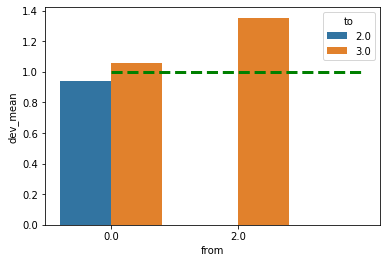

In [263]:
multi_features_plot(['CZE', 'FRA', 'NLD', 'DNK', 'NOR', 'DEU', 'PRT'], 'school_closing',2)


C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


          dev_mean   dev_std
from to                     
0.0  4.0  0.953944       NaN
2.0  3.0  0.699875  0.743470
     4.0  1.507589  0.731896
3.0  4.0  2.469184  2.179124


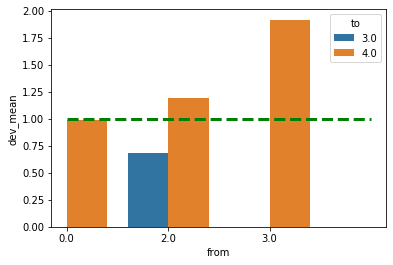

In [264]:
multi_features_plot(['CZE', 'FRA', 'NOR', 'AUT', 'ITA'], 'restrictions_on_gatherings',1)


          dev_mean   dev_std
from to                     
1.0  2.0  0.761089  0.349815
     3.0  0.937235  0.359955
2.0  3.0  1.211892  0.329629


C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


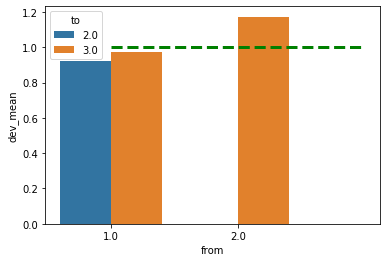

In [265]:
multi_features_plot(['SVN', 'CZE', 'FRA', 'NLD', 'BEL', 'AUT', 'ITA', 'PRT'], 'workplace_closing',2)

C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


          dev_mean   dev_std
from to                     
0.0  1.0  2.635682  2.272671
     2.0  2.083710  1.703522
1.0  2.0  1.048704  0.152499
     3.0  1.312424       NaN
2.0  3.0  1.258467       NaN


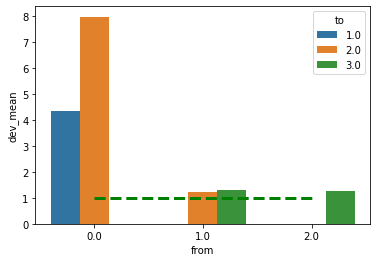

In [273]:
multi_features_plot(['CZE', 'FRA', 'NLD', 'DEU', 'AUT', 'ITA', 'PRT'], 'stay_at_home_requirements',1)

C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


          dev_mean   dev_std
from to                     
0.0  1.0  0.899919  0.091566
     2.0  0.823569  0.362615
1.0  2.0  1.106716  0.232883
     3.0  1.408609       NaN
2.0  3.0  1.268194       NaN


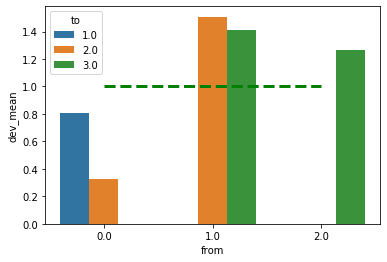

In [266]:
multi_features_plot(['CZE', 'FRA', 'NLD', 'DEU', 'AUT', 'ITA', 'PRT'], 'stay_at_home_requirements',2)

C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


          dev_mean   dev_std
from to                     
0.0  2.0  0.648299       NaN
1.0  2.0  0.865738  0.224066
     3.0  0.854736  0.145460
2.0  3.0  1.570098       NaN


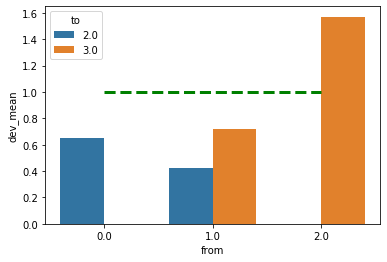

In [267]:
multi_features_plot(['FRA', 'DNK', 'BEL', 'DEU', 'EST', 'GRC', 'SWE'], 'testing_policy',1)

C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


          dev_mean   dev_std
from to                     
0.0  1.0  1.692050       NaN
     2.0  1.452582  0.638509
1.0  2.0  1.292175  0.759267


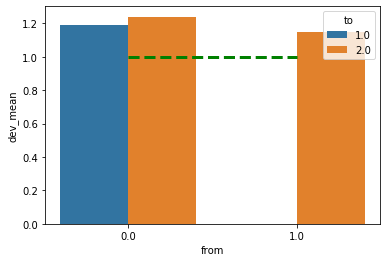

In [268]:
multi_features_plot(['NOR', 'DEU', 'AUT', 'ITA'], 'restrictions_on_internal_movement',2)

          dev_mean   dev_std
from to                     
0.0  2.0  1.568907       NaN
     3.0  1.743490       NaN
2.0  3.0  1.111277       NaN
3.0  4.0  0.929618  0.193956


C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


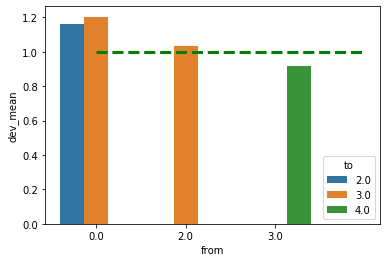

In [269]:
multi_features_plot(['FRA', 'BEL', 'DEU', 'ITA'], 'international_travel_controls',2)

C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


          dev_mean   dev_std
from to                     
0.0  2.0  0.850271       NaN
1.0  2.0  1.103827  0.233452


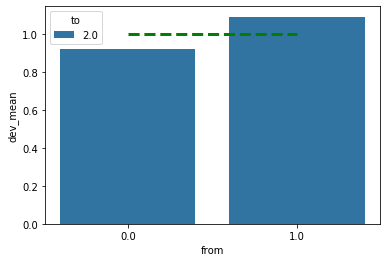

In [270]:
multi_features_plot(['FRA', 'DNK', 'PRT'], 'debt/contract_relief',0)

          dev_mean  dev_std
from to                    
0.0  2.0  0.666104      NaN


C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


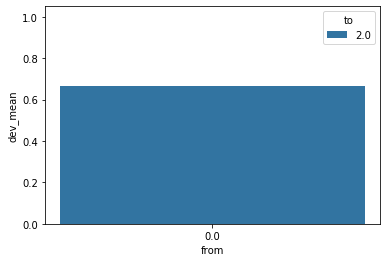

In [271]:
multi_features_plot(['HUN'], 'income_support',1)

C:\anconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


          dev_mean  dev_std
from to                    
0.0  1.0  1.391253      NaN
     2.0  1.091529      NaN
1.0  2.0  0.784565      NaN


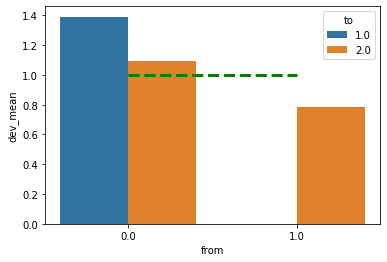

In [272]:
multi_features_plot(['ITA'], 'close_public_transport',2)